# Proyek Analisis Data:[E-Commerce Public Dataset]

*   **Nama :** [Nuramalia Putri]
*   **Email :** [nuramaliaap24@gmail.com]
*   **ID Dicoding :** [chamomile]




# Menentukan Pertanyaan Bisnis



1. Bagaimana demografi pelanggan yang dimiliki?
2. Produk Apa yang paling laris dan paling sedikit terjual?



# Import Semua Package/Library yang Digunakan

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

# Gathering Data
**Tahap Pengumpulan Semua Data yang dibutuhkan**

In [9]:
# load tabel customer
customers_df = pd.read_csv('https://raw.githubusercontent.com/nrmlptr/ProyekAkhirAnalisisPython/master/data/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [10]:
# load tabel geolocation
geolocation_df = pd.read_csv('https://raw.githubusercontent.com/nrmlptr/ProyekAkhirAnalisisPython/master/data/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [11]:
# load tabel orders
orders_df = pd.read_csv('https://raw.githubusercontent.com/nrmlptr/ProyekAkhirAnalisisPython/master/data/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [12]:
# load tabel order items
orderitems_df = pd.read_csv('https://raw.githubusercontent.com/nrmlptr/ProyekAkhirAnalisisPython/master/data/order_items_dataset.csv')
orderitems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [13]:
# load tabel order payment
orderpayments_df = pd.read_csv('https://raw.githubusercontent.com/nrmlptr/ProyekAkhirAnalisisPython/master/data/order_payments_dataset.csv')
orderpayments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [14]:
# load tabel order review
orderreviews_df = pd.read_csv('https://raw.githubusercontent.com/nrmlptr/ProyekAkhirAnalisisPython/master/data/order_reviews_dataset.csv')
orderreviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [15]:
# load tabel product
product_df = pd.read_csv('https://raw.githubusercontent.com/nrmlptr/ProyekAkhirAnalisisPython/master/data/products_dataset.csv')
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [16]:
# load tabel product kategori name
productcatname_df = pd.read_csv('https://raw.githubusercontent.com/nrmlptr/ProyekAkhirAnalisisPython/master/data/product_category_name_translation.csv')
productcatname_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [17]:
# load tabel seller
seller_df = pd.read_csv('https://raw.githubusercontent.com/nrmlptr/ProyekAkhirAnalisisPython/master/data/sellers_dataset.csv')
seller_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


# Assesing Data

**Selanjutnya Menilai Kualitas Data Guna Melihat permasalahan yang ada dalam data**

In [18]:
# nilai data customer
# periksa tipe data dari tiap kolom dengan method info()
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [19]:
# periksa duplikasi dan ringkasan parameter statistik dari kolom numerik
print("Jumlah Duplikasi : ", customers_df.duplicated().sum())
customers_df.describe()

Jumlah Duplikasi :  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [20]:
# nilai data geolocation
# periksa tipe data dari tiap kolom
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


terdapat perbedaan nilai pada kolom geolocation_state

In [21]:
# periksa missing value pada kolom geolocation
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [22]:
# periksa duplikasi data dan parameter statistik dari kolom numerik
print("Jumlah duplikasi :", geolocation_df.duplicated().sum())
geolocation_df.describe()

Jumlah duplikasi : 261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [23]:
# nilai data orders
# periksa tipe data dan jumlah data tiap kolom
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


terdapat perbedaan pada kolom order_approved_at, order_delivered_carrier_date, order_delivered_customer_date

In [24]:
# cari tau missing value pada setiap kolom
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [25]:
# periksa duplikasi data dan paramter statistik dari kolom numerik
print("Jumlah duplikasi : ", orders_df.duplicated().sum())

Jumlah duplikasi :  0


In [26]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [27]:
# nilai data order items
orderitems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [28]:
# periksa duplikasi dan ringkasan parameter statistik
print("Jumlah duplikasi : ", orderitems_df.duplicated().sum())
orderitems_df.describe()

Jumlah duplikasi :  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [29]:
# nilai data order payment
orderpayments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [30]:
# periksa duplikasi data dan ringkasan paramter statistik
print("Jumlah duplikasi :", orderpayments_df.duplicated().sum())
orderpayments_df.describe()

Jumlah duplikasi : 0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [31]:
# nilai data order review
orderreviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


terdapat perbedaan pada beberapa kolom seperti review_comment_title dan review_Comment_message

In [32]:
# cari tau missing valuenya
orderreviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [33]:
# periksa duplikasi data dan parameter statistik nya
print("Jumlah duplikasi :", orderreviews_df.duplicated().sum())
orderreviews_df.describe()

Jumlah duplikasi : 0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [34]:
# nilai data product
# periksa tipe data dan jumlah data
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


terdapat perbedaan pada beberapa kolom.

In [35]:
# periksa missing value
product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [36]:
# periksa duplikasi data dan parameter statistik
print("Jumlah duplikasi :", product_df.duplicated().sum())
product_df.describe()

Jumlah duplikasi : 0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [37]:
# nilai data product category name translation
productcatname_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [38]:
# periksa duplikasi data dan parameter statistik
print("Jumlah duplikasi :", productcatname_df.duplicated().sum())
productcatname_df.describe()

Jumlah duplikasi : 0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [39]:
# nilai data seller
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [40]:
# periksa duplikasi data dan parameter statistik
print("Jumlah duplikasi :", seller_df.duplicated().sum())
seller_df.describe()

Jumlah duplikasi : 0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


# Cleaning Data

**selanjutnya tahap terakhir pada proses data wrangling, bersihkan masalah yang sudah ditemukan pada proses assesing data**

Cleaning Data Geolocation
1. missing value
2. duplikasi data

In [41]:
# menghilangkan duplikasi data
geolocation_df.drop_duplicates(inplace=True)

In [42]:
# periksa kembali duplikasi
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


In [43]:
# mengatasi missing value
# gunakan teknik filtering untuk mengetahui data yang mengandung missing value
geolocation_df[geolocation_df.geolocation_state.isna()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state


In [44]:
# identifikasi nilai dominan
geolocation_df.geolocation_state.value_counts()

SP    285976
MG    101353
RJ     78836
RS     48093
PR     45059
SC     30191
BA     27720
GO     15601
PE     13162
ES     12632
CE      9541
MT      9374
DF      9080
MS      8594
PA      8551
MA      6277
PB      4787
RN      4014
PI      3592
AL      3415
TO      2977
SE      2653
RO      2523
AM      1986
AC      1039
AP       738
RR       568
Name: geolocation_state, dtype: int64

In [45]:
# gunakan nilai dominan untuk mengganti missing value
geolocation_df.fillna(value="SP", inplace=True)

In [46]:
# periksa kembali missing value
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Cleaning Data Orders
1. missing value

In [47]:
# mengatasi missing value
# gunakan teknik filtering untuk mengetahui data yang mengandung missing value
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [48]:
# identifikasi nilai dominan
orders_df.order_approved_at.value_counts()

2018-02-27 04:31:10    9
2017-11-07 07:30:38    7
2018-02-27 04:31:01    7
2018-02-06 05:31:52    7
2017-11-07 07:30:29    7
                      ..
2018-08-22 11:50:14    1
2017-09-22 11:27:36    1
2018-03-07 16:40:32    1
2017-08-08 10:50:15    1
2018-03-09 11:20:28    1
Name: order_approved_at, Length: 90733, dtype: int64

In [49]:
# gunakan nilai dominan untuk mengganti missing value
orders_df.fillna(value="2018-02-27 04:31:10", inplace=True)

In [50]:
# periksa kembali missing value
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Cleaning Data Product
1. missing value

In [51]:
# mengatasi missing value
# gunakan teknik filtering untuk mengetahui data yang mengandung missing value
print(orderreviews_df[orderreviews_df.review_comment_title.isna()])
print('-------------------------------------------------------------')
print(orderreviews_df[orderreviews_df.review_comment_message.isna()])


                              review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
0                 4            

In [52]:
# identifikasi nilai dominan
print(orderreviews_df.review_comment_title.value_counts())
print('--------------------------------------------')
print(orderreviews_df.review_comment_message.value_counts())

Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: review_comment_title, Length: 4527, dtype: int64
--------------------------------------------
Muito bom                                                                                                                                                                                              230
Bom                                                                                                                                                                                                    189
muito bom                                                                                                                          

In [53]:
# gunakan nilai dominan untuk mengganti missing value
print(orderreviews_df.fillna(value="Recomendo", inplace=True))
print('--------------------------------------------')
print(orderreviews_df.fillna(value="Muito Bom", inplace=True))


None
--------------------------------------------
None


In [54]:
# periksa kembali missing value
orderreviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

Cleaning Data Product
1. missing value

In [55]:
# mengatasi missing value
# gunakan teknik filtering untuk mengetahui data yang mengandung missing value
print(product_df[product_df.product_category_name.isna()])
print('--------------------------------------------------------------------------------------------')
print(product_df[product_df.product_name_lenght.isna()])
print('--------------------------------------------------------------------------------------------')
print(product_df[product_df.product_description_lenght.isna()])
print('--------------------------------------------------------------------------------------------')
print(product_df[product_df.product_photos_qty.isna()])
print('--------------------------------------------------------------------------------------------')
print(product_df[product_df.product_weight_g.isna()])
print('--------------------------------------------------------------------------------------------')
print(product_df[product_df.product_length_cm.isna()])
print('--------------------------------------------------------------------------------------------')
print(product_df[product_df.product_height_cm.isna()])
print('--------------------------------------------------------------------------------------------')
print(product_df[product_df.product_width_cm.isna()])
print('--------------------------------------------------------------------------------------------')

                             product_id product_category_name  \
105    a41e356c76fab66334f36de622ecbd3a                   NaN   
128    d8dee61c2034d6d075997acef1870e9b                   NaN   
145    56139431d72cd51f19eb9f7dae4d1617                   NaN   
154    46b48281eb6d663ced748f324108c733                   NaN   
197    5fb61f482620cb672f5e586bb132eae9                   NaN   
...                                 ...                   ...   
32515  b0a0c5dd78e644373b199380612c350a                   NaN   
32589  10dbe0fbaa2c505123c17fdc34a63c56                   NaN   
32616  bd2ada37b58ae94cc838b9c0569fecd8                   NaN   
32772  fa51e914046aab32764c41356b9d4ea4                   NaN   
32852  c4ceee876c82b8328e9c293fa0e1989b                   NaN   

       product_name_lenght  product_description_lenght  product_photos_qty  \
105                    NaN                         NaN                 NaN   
128                    NaN                         NaN         

In [56]:
# identifikasi nilai dominan
print(product_df.product_category_name.value_counts())
print('--------------------------------------------------------------------------------------------')
print(product_df.product_name_lenght.value_counts())
print('--------------------------------------------------------------------------------------------')
print(product_df.product_description_lenght.value_counts())
print('--------------------------------------------------------------------------------------------')
print(product_df.product_photos_qty.value_counts())
print('--------------------------------------------------------------------------------------------')
print(product_df.product_weight_g.value_counts())
print('--------------------------------------------------------------------------------------------')
print(product_df.product_length_cm.value_counts())
print('--------------------------------------------------------------------------------------------')
print(product_df.product_height_cm.value_counts())
print('--------------------------------------------------------------------------------------------')
print(product_df.product_width_cm.value_counts())
print('--------------------------------------------------------------------------------------------')

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64
--------------------------------------------------------------------------------------------
60.0    2182
59.0    2025
58.0    1887
57.0    1719
55.0    1683
        ... 
66.0       1
72.0       1
67.0       1
76.0       1
6.0        1
Name: product_name_lenght, Length: 66, dtype: int64
--------------------------------------------------------------------------------------------
404.0     94
729.0     86
651.0     66
703.0     66
236.0     65
          ..
2795.0     1
2308.0     1
3698.0     1
3522.0     1
2207.0     1
Name

In [57]:
# gunakan nilai dominan untuk mengganti missing value
print(product_df.fillna(value="cama_mensa_banho", inplace=True))
print('--------------------------------------------------------------------------------------------')
print(product_df.fillna(value="60.0", inplace=True))
print('--------------------------------------------------------------------------------------------')
print(product_df.fillna(value="404.0", inplace=True))
print('--------------------------------------------------------------------------------------------')
print(product_df.fillna(value="1.0", inplace=True))
print('--------------------------------------------------------------------------------------------')
print(product_df.fillna(value="200.0", inplace=True))
print('--------------------------------------------------------------------------------------------')
print(product_df.fillna(value="16.0", inplace=True))
print('--------------------------------------------------------------------------------------------')
print(product_df.fillna(value="10.0", inplace=True))
print('--------------------------------------------------------------------------------------------')
print(product_df.fillna(value="11.0", inplace=True))
print('--------------------------------------------------------------------------------------------')

None
--------------------------------------------------------------------------------------------
None
--------------------------------------------------------------------------------------------
None
--------------------------------------------------------------------------------------------
None
--------------------------------------------------------------------------------------------
None
--------------------------------------------------------------------------------------------
None
--------------------------------------------------------------------------------------------
None
--------------------------------------------------------------------------------------------
None
--------------------------------------------------------------------------------------------


In [58]:
# periksa kembali missing value
product_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

# Exploratory Data Analysis (EDA)

**tahap selanjutnya melakukan eksplorasi terhadap setiap data untuk mencari insight menarik yang bisa menjadi jawaban dari pertanyaan yang sudah diajukan**

Eksplorasi Data Customer

sebagai permulaan lihat dulu rangkuman parameter statistik dari data customers dengan method describe.

In [59]:
print(customers_df.describe(include="all"))
print('--------------------------------------------------------')
print(customers_df.sample(5))

                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix customer_city customer_state  

selanjutnya Cari tau demografi pelanggan based on city dan state menggunakan method groupby() yang diikuti method agg()

In [60]:
print(customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False))
print('----------------------------------------------------------------------------------------------------')
print(customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False))

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64
----------------------------------------------------------------------------------------------------
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64


Berdasarkan hasil diatas, terlihat persebaran pelanggan tidak merata disetiap kota dan negara bagian. Dalam data tercatat bahwa pelanggan paling banyak berasal dari kota sao paulo, rio de janeiro, dan belo horizonte sedangkan untuk pelanggan terbanyak dari negara bagian berasal dari negara SP.

Eksplorasi Data Order

mengandung berbagai informasi terkait sebuah order.

In [61]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
85655,0328d8f9de9ac416aef56ea44972a5d8,93981a3a039274f7c0f9dfaa22318d78,delivered,2017-10-18 16:06:09,2017-10-18 16:34:55,2017-10-19 15:49:05,2017-10-24 14:38:30,2017-11-07 00:00:00
71782,ae60d8ce9aa713ec6cc02a1b15e6759e,6a8e32e45208a7e5bb55c5f84ef10e53,unavailable,2017-05-30 12:07:33,2017-05-30 13:10:38,2018-02-27 04:31:10,2018-02-27 04:31:10,2017-06-30 00:00:00
31610,cc2480ffed97aa0b9a9676f40f9bb1db,4d36f99640ab0dd5ce16ddc05ea49857,delivered,2018-04-17 07:45:28,2018-04-18 08:51:41,2018-04-20 16:56:55,2018-04-24 23:38:40,2018-05-04 00:00:00
87435,4c6f0636c0c9ee094350e2ed1884c068,5a5a75d11cf6794417f567dd826d7475,delivered,2018-02-15 16:04:24,2018-02-15 16:15:27,2018-02-16 20:57:16,2018-03-15 19:22:43,2018-03-14 00:00:00
71998,52c470bb7e38c0180705d1339fbc1cc4,58226f65e8043f2fecf5ca45bc00f460,delivered,2018-05-05 17:11:22,2018-05-08 03:52:59,2018-05-11 15:52:00,2018-06-06 20:52:08,2018-05-29 00:00:00


eksplorasia data order dan data customer
pada data orders_df terdapat kolom yang berisi informasi terkait customer id pelanggan yang pernah melakukan order. Informasi ini bisa digunakan untuk mengidentifikasi pelanggan yang belum pernah melakukan order. Untuk melakukan hal ini, bisa membuat sebuah kolom baru bernama “status” pada data customers_df. Kolom tersebut memiliki nilai “Active” untuk pelanggan yang pernah melakukan order setidaknya sekali dan sebaliknya bernilai “Non Active” untuk pelanggan yang belum pernah melakukan order sama sekali.

In [62]:
customer_id_in_orders_df = orders_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
43754,621db81dd0257835e7dbb90e5305c687,3d987951980db0e743ed51b4aa0afdc6,87010,maringa,PR,Active
63622,47ae8245cfea34ac0c57a04fb956a80a,a4bdd0ff2e35ee74e8482600c5c0db53,67200,marituba,PA,Active
91099,966b9cbe267afb17f5da34ba905a34fa,c17dfb6f0f59de912f9e565439a0d68d,24210,niteroi,RJ,Active
26338,46898c46b3a1f1a811de916fb77e5659,b06f1e8e724f73b85d691ea983119c41,33880,ribeirao das neves,MG,Active
11985,e7629e1a9eeec0931a10225eaf7603fd,a71ddf103ddf305d0908e822c0d1b6d7,8790,mogi das cruzes,SP,Active


untuk mengetahui informasi jumlah pelanggan yang berstatus aktif dan tidak aktif bisa menggunakan pivot table

In [63]:
customers_df.groupby("status").customer_id.count()

status
Active    99441
Name: customer_id, dtype: int64

dari hasil diatas, disimpulkan bahwa data customer yang tertera merupakan 100% data customer yang active melakukan pembelian di toko. untuk melihat informasi lebih lanjut dapat menggunakan merge join kedua tabel

In [64]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)

orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active


kita juga bisa coba mencari tahu jumlah order terbanyak berdasarkan kota

In [65]:
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


Berdasarkan data diatas, diketahui bahwa kota sao paulo dan rio de janeiro merupakan kota yang memiliki orderan terbanyak.
dari sini kita bisa melihat jumlah order berdasarkan state juga.

In [66]:
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: order_id, dtype: int64

Dari data diatas, dapat diketahui bahwa SP atau Spanyol merupakan state yang paling banyak melakukan orderan.

Eksplorasi Data Order Item dan Order Payment

In [67]:
print(orderpayments_df.describe(include="all"))
print('--------------------------------------------------------------')
print(orderitems_df.describe(include="all"))

                                order_id  payment_sequential payment_type  \
count                             103886       103886.000000       103886   
unique                             99440                 NaN            5   
top     fa65dad1b0e818e3ccc5cb0e39231352                 NaN  credit_card   
freq                                  29                 NaN        76795   
mean                                 NaN            1.092679          NaN   
std                                  NaN            0.706584          NaN   
min                                  NaN            1.000000          NaN   
25%                                  NaN            1.000000          NaN   
50%                                  NaN            1.000000          NaN   
75%                                  NaN            1.000000          NaN   
max                                  NaN           29.000000          NaN   

        payment_installments  payment_value  
count          103886.000000 

Berdasarkan data diatas, tertera bahwa harga barang yang dijual berkisar dimulai dengan harga 85 hingga 13664 dollar. selain itu pada setiap transaksi pelanggan paling banyak membeli barang dengan total harga sebesar 6735  dollar.

In [68]:
# ketahui harga product termahal dan termurah
orderitems_df.sort_values(by="price", ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34
...,...,...,...,...,...,...,...
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
48625,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23
27652,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23


Untuk memperoleh data lebih jelas kita dapat menggabungkan tabel orderitems dengan tabel product menggunakan merge join

In [69]:
product_orderitems_df = pd.merge(
    left=orderitems_df,
    right=product_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

product_orderitems_df.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69,utilidades_domesticas,36.0,558.0,1.0,450.0,24.0,8.0,15.0
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85,telefonia,52.0,815.0,1.0,200.0,27.0,5.0,20.0
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,ferramentas_jardim,39.0,1310.0,3.0,13805.0,35.0,75.0,45.0
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65,beleza_saude,59.0,493.0,1.0,2000.0,30.0,12.0,16.0
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40,livros_tecnicos,52.0,1192.0,1.0,850.0,29.0,3.0,21.0


kita dapat menggunakan pivot table untuk mengetahui informasi terkait produk berdasarkan nama.

In [70]:
product_orderitems_df.groupby(by="product_category_name").agg({
    "product_id": "nunique",
    "freight_value": "sum",
    "price": ["min","max"]
})

product_id freight_value  price         
                             nunique           sum    min      max
product_category_name                                             
agro_industria_e_comercio         74       5843.60  12.99  2990.00
alimentos                         82       7271.03   9.99   274.99
alimentos_bebidas                104       4507.99   6.50   699.90
artes                             55       4045.17   3.50  6499.00
artes_e_artesanato                19        370.13   9.80   289.49
...                              ...           ...    ...      ...
sinalizacao_e_seguranca           93       6507.82   4.50   740.00
tablets_impressao_imagem           9       1226.20  14.90   889.99
telefonia                       1134      71215.79   5.00  2428.00
telefonia_fixa                   116       4637.81   6.00  1790.00
utilidades_domesticas           2335     146149.11   3.06  6735.00

[74 rows x 4 columns]

Eksplorasi Data Seller

pertama kali, dlihat dari rangkuman parameter statistik dengan menggunakan method describe()

In [71]:
print(seller_df.describe(include="all"))

                               seller_id  seller_zip_code_prefix seller_city  \
count                               3095             3095.000000        3095   
unique                              3095                     NaN         611   
top     3442f8959a84dea7ee197c632cb2df15                     NaN   sao paulo   
freq                                   1                     NaN         694   
mean                                 NaN            32291.059451         NaN   
std                                  NaN            32713.453830         NaN   
min                                  NaN             1001.000000         NaN   
25%                                  NaN             7093.500000         NaN   
50%                                  NaN            14940.000000         NaN   
75%                                  NaN            64552.500000         NaN   
max                                  NaN            99730.000000         NaN   

       seller_state  
count          30

mengetahui seller mana yang paling sering mengirimkan product ke toko berdasarkan kota dengan melakukan merge join antara order item dan seller.

In [72]:
seller_product_df = pd.merge(
    left=orderitems_df,
    right=seller_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)

seller_product_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [73]:
# cari tau produk terbanyak dari seller mana berdasarkan kota
seller_product_df.groupby(by="seller_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,seller_city,order_id
0,sao paulo,24588
1,ibitinga,6565
2,curitiba,2722
3,santo andre,2711
4,belo horizonte,2414
5,rio de janeiro,2193
6,guarulhos,2071
7,ribeirao preto,2019
8,sao jose do rio preto,1973
9,maringa,1860


Berdasarkan data diatas, diketahui bahwa seller yang paling banyak mengirimkan produk atau menyuplay product berasal dari kota sao paulo, ibtinga dan curitiba.

In [74]:
# cari tau produk terbanyak dari seller mana berdasarkan state
seller_product_df.groupby(by="seller_state").order_id.nunique().sort_values(ascending=False)

seller_state
SP    70188
MG     7930
PR     7673
RJ     4353
SC     3667
RS     1989
DF      824
BA      569
GO      463
PE      406
MA      392
ES      318
MT      137
CE       91
RN       51
MS       49
PB       36
RO       14
PI       12
SE        9
PA        8
AM        3
AC        1
Name: order_id, dtype: int64

Berdasarkan data diatas, seller yang paling sering mengirim product berasal dari negara bagian SP atau Spanyol.

Eksplorasi Data all_df untuk melihat pola pembelian berdasarkan demografi pelanggan dengan membuat sebuah dataframe bernama all_df untuk menampung semua informasi dari semua tabel yang tersedia.

In [75]:
all_df = pd.merge(
    left=product_orderitems_df,
    right=orders_customers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,Active
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,Active
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,Active
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,Active
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,Active


Selanjutnya lihat preferensi pembelian berdasarkan state pelanggan dan nama product.

In [76]:
all_df.groupby(by=["customer_state", "product_category_name"]).agg({
    "freight_value": "sum",
    "price": "sum"
})

freight_value    price
customer_state product_category_name                              
AC             artigos_de_natal                     60.95    69.90
               automotivo                          120.93   540.98
               bebes                               174.13   697.84
               beleza_saude                        268.42  1386.58
               brinquedos                           83.26   234.79
...                                                   ...      ...
TO             portateis_casa_forno_e_cafe          95.44  1999.00
               relogios_presentes                  950.02  5446.89
               telefonia                           627.34  1268.12
               telefonia_fixa                       53.58  1390.99
               utilidades_domesticas               484.74  1275.75

[1394 rows x 2 columns]

berdasarkan data diatas, tergambarkan bahwa product yang disukai pelanggan berdasarkan negara lokasi bagiannya. dari data disebutkan bahwa beleza_saude paling banyak terjual di AO dan relogios_presentes banyak terjual di negara bagian TO.

# Visualization & Explanatory Analysis


**pada tahap selanjutnya, berdasarkan hasil explorasi data dibuatkan gambaran visualisasi data nya agar lebih mudah dibaca, serta penjelasan mengenai jawaban yang sebelumnya sudah dibuat dalam tahap data wrangling serta exploratory data analysis**

# Pertanyaan 1 : Bagaimana Demografi pelanggan yang dimiliki?

Pertama, buat terlebih dahulu dataframe baru untuk menampung informasi terkait jumlah pelanggan untuk demografi tertentu seperti state.

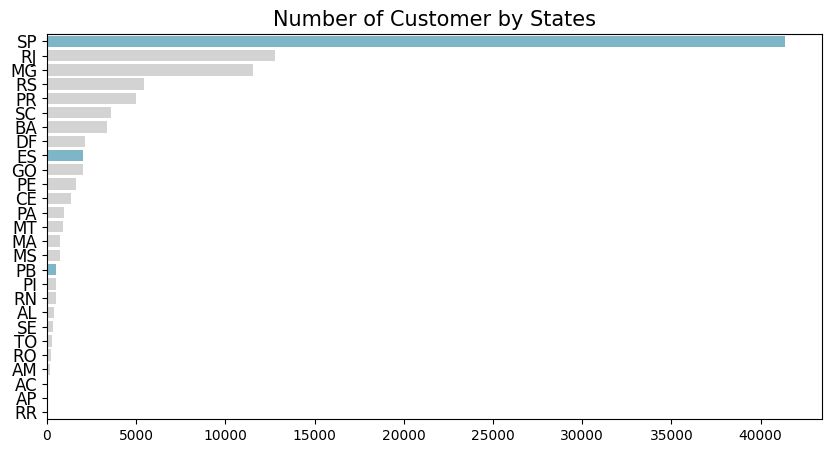

In [77]:
# identifikasi jumlah pelanggan berdasarkan states
bystate_df = all_df.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bystate_df
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count",
    y="customer_state",
    data=bystate_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

# Pertanyaan 2 : Produk apa yang paling banyak dan paling sedikit terjual?

identifikasi produk dengan penjualan terbanyak dan paling sedikit. dengan membuat sebuah dataframe baru guna menampung informasi terkait jumlah penjualan produk.

In [78]:
sum_order_items_df = all_df.groupby(by="product_category_name").freight_value.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(15)

,product_category_name,freight_value
0,cama_mesa_banho,204693.04
1,beleza_saude,182566.73
2,moveis_decoracao,172749.30
3,esporte_lazer,168607.51
4,informatica_acessorios,147318.08
5,utilidades_domesticas,146149.11
6,relogios_presentes,100535.93
7,ferramentas_jardim,98962.75
8,automotivo,92664.21
9,cool_stuff,84039.10


Untuk mempermudah dalam menyampaikan informasi tersebut, buat visualisasi data dalam bentuk bar chart untuk mempermudah orang lain dalam mengidentifikasi produk dengan performa terbaik dan terburuk. buat dua buah visualisasi data dalam satu gambar visual menggunakan function subplot().

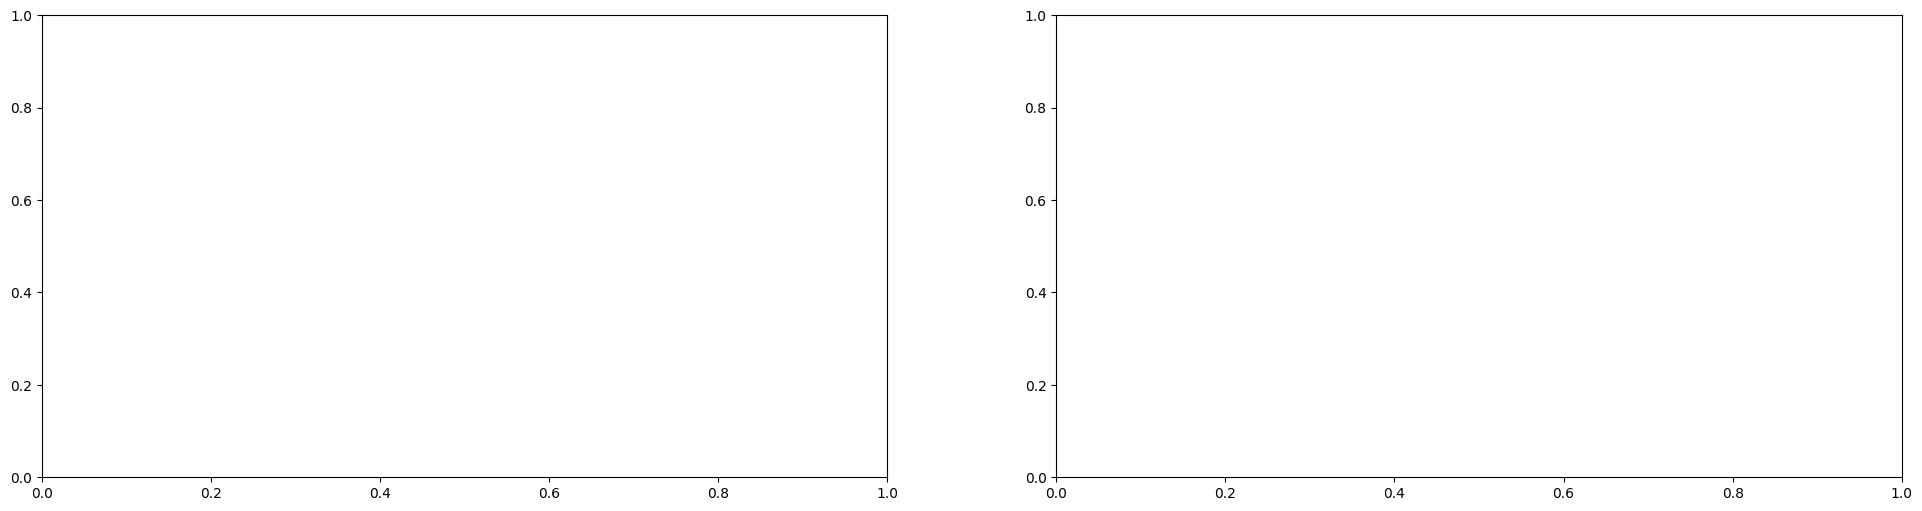

In [79]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

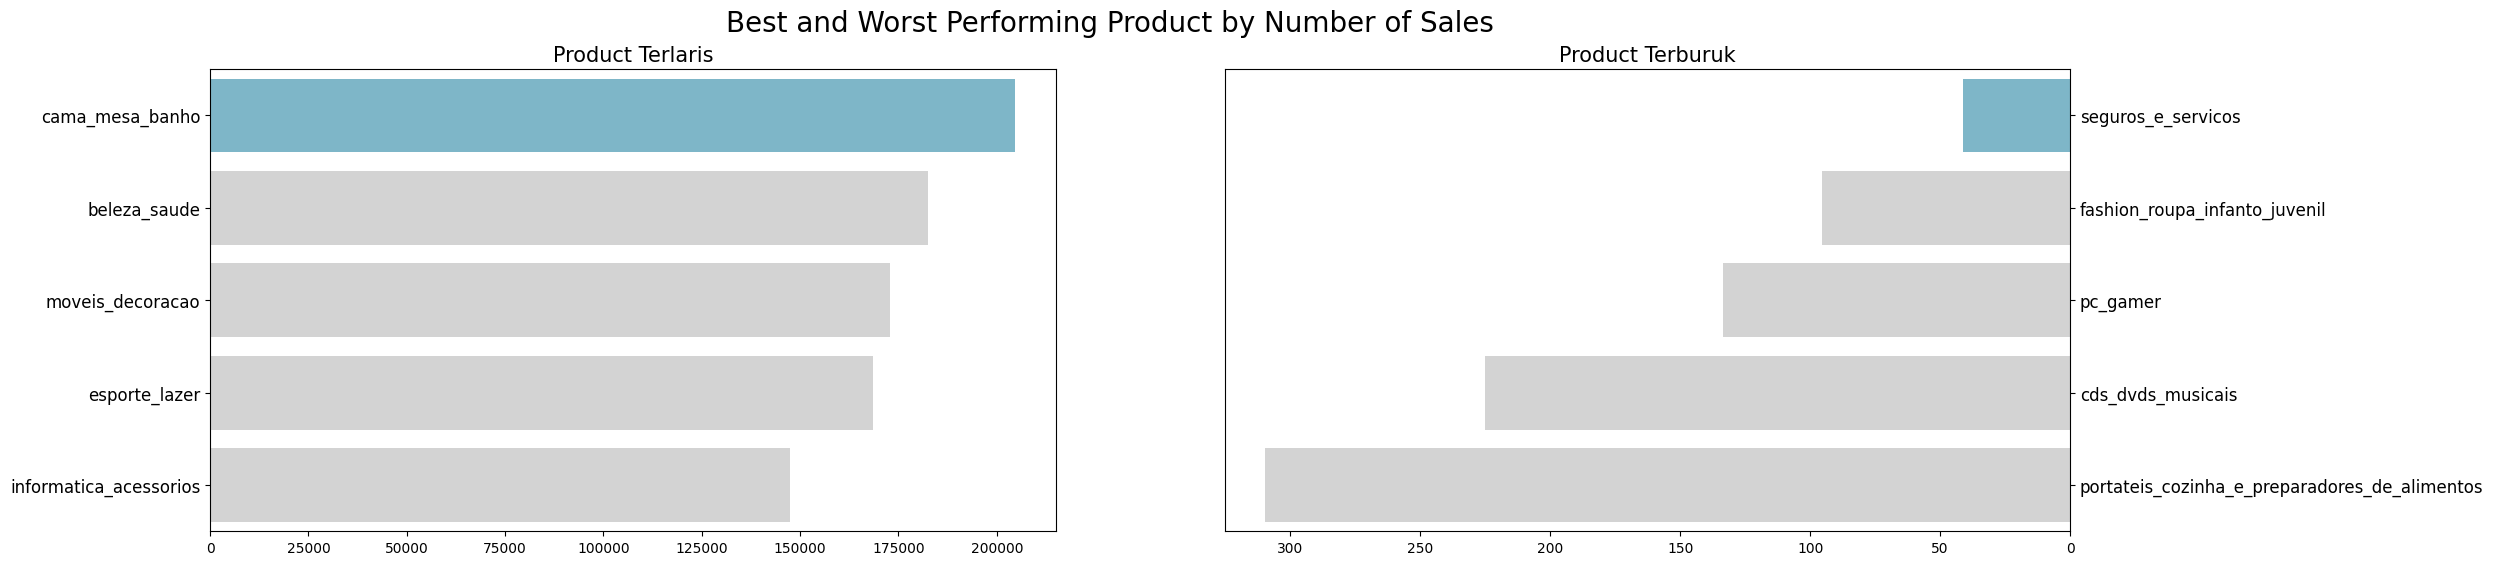

In [80]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="freight_value", y="product_category_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Product Terlaris", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="freight_value", y="product_category_name", data=sum_order_items_df.sort_values(by="freight_value", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Product Terburuk", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

# Conclusion

1. dari pertanyaan 1 dapat diketahui bahwa, pelanggan terbanyak berdasarkan demografi city berasal dari kota sao paulo serta pelanggan terbanyak berdasarkan state berdasarkan dari negara bagian SP atau Spanyol.

2. conclusion yang kedua, produk yang terlaris berdasarkan data dapat dilihat yaitu cama_mesa_banho serta produk yang sedikit terjual diperoleh oleh seguros_e_servicos.

In [81]:
# untuk ekspor data

all_df.to_csv("all_data.csv", index=False)